Importing modules

In [1]:
import numpy
from collections import Counter
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Functions for distance and knn itself

In [3]:
def euclidian_distance(p1, p2):
    return numpy.sqrt(numpy.sum((numpy.array(p1) - numpy.array(p2))**2))

def manhattan_distance(p1, p2):
    return numpy.sum(numpy.abs(numpy.array(p1) - numpy.array(p2)))

def minkowski_distance(p1, p2, p):
    return numpy.sum((numpy.array(p1) - numpy.array(p2))**p)**(1/p)



def knn_classification(trainX, trainY, testX, k, p):
    testY = []
    for i in range(len(testX)):
        distances = []
        for j in range(len(trainX)):
            dist = minkowski_distance(testX[i], trainX[j], p)
            distances.append((dist, trainY[j]))
        distances.sort(key=lambda x: x[0])
        k_nearest_classes = [label for _, label in distances[:k]]
        most_common_class = Counter(k_nearest_classes).most_common(1)[0][0]
        testY.append(most_common_class)
    
    return testY

Iris Dataset - Data loading, separation and normalization

In [5]:
# ===== CONFIGURE HERE =====
csv_path = "../../Datasets/Iris.csv"
test_size = 0.3  
random_state = 42  

# ===== LOAD DATASET =====
df = pandas.read_csv(csv_path)
print(f"✅ Loaded dataset: {csv_path}")
print(f"   Rows: {len(df)}, Columns: {len(df.columns)}")
df = df.iloc[:, 1:]  # keep only real features + label

# ===== SPLIT DATASET =====
train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)

print(f"Training set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")

print("\nTraining set sample:")
print(train_df.head())
print("\nTest set sample:")
print(test_df.head())

# Separate features and labels
X_train = train_df.iloc[:, :-1].values  
Y_train = train_df.iloc[:, -1].values   
X_test = test_df.iloc[:, :-1].values
Y_test = test_df.iloc[:, -1].values

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train:")
print(X_train)

print("\nY_train:")
print(Y_train)

print("\nX_test:")
print(X_test)

print("\nY_test:")
print(Y_test)

# ===== SCALLING TO GET MEAN = 0 AND STANDARD DEVIATION = 1 =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train:")
print(X_train)

print("\nY_train:")
print(Y_train)

print("\nX_test:")
print(X_test)

print("\nY_test:")
print(Y_test)

✅ Loaded dataset: ../../Datasets/Iris.csv
   Rows: 150, Columns: 6
Training set: 105 rows
Test set: 45 rows

Training set sample:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
81             5.5           2.4            3.7           1.0  Iris-versicolor
133            6.3           2.8            5.1           1.5   Iris-virginica
137            6.4           3.1            5.5           1.8   Iris-virginica
75             6.6           3.0            4.4           1.4  Iris-versicolor
109            7.2           3.6            6.1           2.5   Iris-virginica

Test set sample:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
73             6.1           2.8            4.7           1.2  Iris-versicolor
18             5.7           3.8            1.7           0.3      Iris-setosa
118            7.7           2.6            6.9           2.3   Iris-virginica
78             6.0           2.9            4.5           1.5 

Iris Dataset - Testing 

k=1, Accuracy=0.9778, Precision=0.9794, Recall=0.9778, F1-Score=0.9777
k=2, Accuracy=0.9778, Precision=0.9794, Recall=0.9778, F1-Score=0.9777
k=3, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-Score=1.0000
k=4, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-Score=1.0000
k=5, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-Score=1.0000
k=6, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-Score=1.0000
k=7, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-Score=1.0000
k=8, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-Score=1.0000
k=9, Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-Score=1.0000
✅ Best k: 3
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


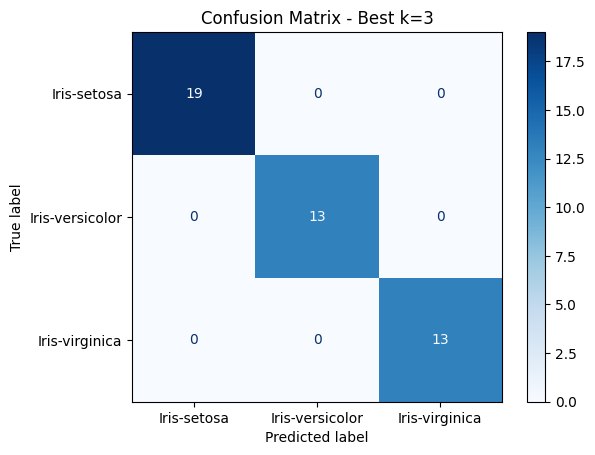

In [11]:
melhor_k = 0
melhor_f1 = 0
melhor_acc = 0
melhor_prec = 0
melhor_rec = 0

for k in range(1, 10):
    pred = knn_classification(X_train, Y_train, X_test, k, 2)
    acc = accuracy_score(Y_test, pred)
    prec = precision_score(Y_test, pred, average='weighted', zero_division=0)
    rec = recall_score(Y_test, pred, average='weighted', zero_division=0)
    f1 = f1_score(Y_test, pred, average='weighted', zero_division=0)
    print(f"k={k}, Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

    if f1 > melhor_f1:
        melhor_f1 = f1
        melhor_acc = acc
        melhor_prec = prec
        melhor_rec = rec
        melhor_k = k
        melhor_pred = pred

print(f"✅ Best k: {melhor_k}")
print(f"Accuracy: {melhor_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(Y_test, melhor_pred, labels=df['Species'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Species'].unique())
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - Best k={melhor_k}")
plt.show()

Diabetes Dataset - Data loading, separation and normalization

In [12]:
# ===== CONFIGURE HERE =====
csv_path = "../../Datasets/diabetes.csv"
test_size = 0.3  
random_state = 42  

# ===== LOAD DATASET =====
df = pandas.read_csv(csv_path)
print(f"✅ Loaded dataset: {csv_path}")
print(f"   Rows: {len(df)}, Columns: {len(df.columns)}")
df = df.iloc[:, 1:]  

# ===== SPLIT DATASET =====
train_df_diabetes, test_df_diabetes = train_test_split(df, test_size=test_size, random_state=random_state)

print(f"Training set: {len(train_df_diabetes)} rows")
print(f"Test set: {len(test_df_diabetes)} rows")

# ===== OPTIONAL: inspect first few rows =====
print("\nTraining set sample:")
print(train_df_diabetes.head())
print("\nTest set sample:")
print(test_df_diabetes.head())

# Separate features and labels
X_train_diabetes = train_df_diabetes.iloc[:, :-1].values  
Y_train_diabetes = train_df_diabetes.iloc[:, -1].values  
X_test_diabetes = test_df_diabetes.iloc[:, :-1].values
Y_test_diabetes = test_df_diabetes.iloc[:, -1].values

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train_diabetes:")
print(X_train_diabetes)

print("\nY_train_diabetes:")
print(Y_train_diabetes)

print("\nX_test_diabetes:")
print(X_test_diabetes)

print("\nY_test_diabetes:")
print(Y_test_diabetes)

# ===== SCALLING TO GET MEAN = 0 AND STANDARD DEVIATION = 1 =====
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train_diabetes:")
print(X_train_diabetes)

print("\nY_train_diabetes:")
print(Y_train_diabetes)

print("\nX_test_diabetes:")
print(X_test_diabetes)

print("\nY_test_diabetes:")
print(Y_test_diabetes)

✅ Loaded dataset: ../../Datasets/diabetes.csv
   Rows: 768, Columns: 9
Training set: 537 rows
Test set: 231 rows

Training set sample:
     Glucose  BloodPressure  ...  Age  Outcome
334       95             60  ...   22        0
139      105             72  ...   28        0
485      135             68  ...   24        1
547      131             68  ...   28        0
18       103             30  ...   33        0

[5 rows x 8 columns]

Test set sample:
     Glucose  BloodPressure  ...  Age  Outcome
668       98             58  ...   43        0
324      112             75  ...   21        0
624      108             64  ...   21        0
690      107             80  ...   34        0
473      136             90  ...   50        0

[5 rows x 8 columns]

X_train_diabetes:
[[ 95.     60.     18.    ...  23.9     0.26   22.   ]
 [105.     72.     29.    ...  36.9     0.159  28.   ]
 [135.     68.     42.    ...  42.3     0.365  24.   ]
 ...
 [101.     86.     37.    ...  45.6     1.136  38.

Diabetes Dataset - Testing

k=1, Accuracy=0.6537, Precision=0.5000, Recall=0.5250, F1-Score=0.5122
k=2, Accuracy=0.6537, Precision=0.5000, Recall=0.5250, F1-Score=0.5122
k=3, Accuracy=0.6970, Precision=0.5625, Recall=0.5625, F1-Score=0.5625
k=4, Accuracy=0.7056, Precision=0.5811, Recall=0.5375, F1-Score=0.5584
k=5, Accuracy=0.6926, Precision=0.5652, Recall=0.4875, F1-Score=0.5235
k=6, Accuracy=0.6926, Precision=0.5616, Recall=0.5125, F1-Score=0.5359
k=7, Accuracy=0.7273, Precision=0.6232, Recall=0.5375, F1-Score=0.5772
k=8, Accuracy=0.7143, Precision=0.5921, Recall=0.5625, F1-Score=0.5769
k=9, Accuracy=0.7229, Precision=0.6143, Recall=0.5375, F1-Score=0.5733
k=10, Accuracy=0.7229, Precision=0.6143, Recall=0.5375, F1-Score=0.5733
k=11, Accuracy=0.7576, Precision=0.6818, Recall=0.5625, F1-Score=0.6164
k=12, Accuracy=0.7532, Precision=0.6575, Recall=0.6000, F1-Score=0.6275
k=13, Accuracy=0.7403, Precision=0.6389, Recall=0.5750, F1-Score=0.6053
k=14, Accuracy=0.7359, Precision=0.6377, Recall=0.5500, F1-Score=0.5906
k

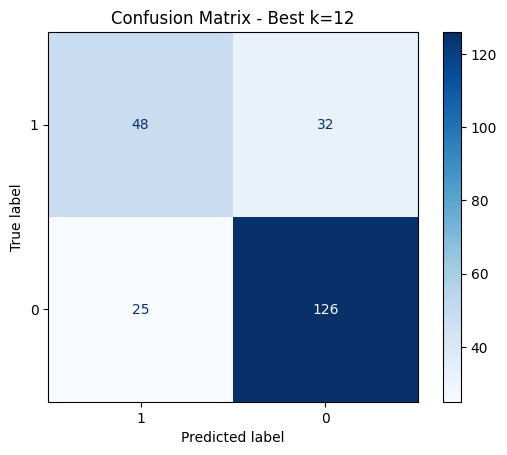

In [15]:
melhor_k = 0
melhor_f1 = 0
melhor_acc = 0
melhor_prec = 0
melhor_rec = 0

for k in range(1, 30):
    pred = knn_classification(X_train_diabetes, Y_train_diabetes, X_test_diabetes, k, 2)
    acc = accuracy_score(Y_test_diabetes, pred)
    prec = precision_score(Y_test_diabetes, pred, average='binary', zero_division=0)
    rec = recall_score(Y_test_diabetes, pred, average='binary', zero_division=0)
    f1 = f1_score(Y_test_diabetes, pred, average='binary', zero_division=0)
    print(f"k={k}, Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

    if f1 > melhor_f1:
        melhor_f1 = f1
        melhor_acc = acc
        melhor_prec = prec
        melhor_rec = rec
        melhor_k = k
        melhor_pred = pred

print(f"✅ Best k: {melhor_k}")
print(f"Accuracy: {melhor_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(Y_test_diabetes, melhor_pred, labels=df['Outcome'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Outcome'].unique())
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - Best k={melhor_k}")
plt.show()